In [83]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [84]:
dfs=pd.read_csv("Restaurant_Reviews.tsv", delimiter="\t", quoting=3)
dfs.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [85]:
dfs.shape

(1000, 2)

In [86]:
dfs.isnull().values.any()

False

C:\Users\91729\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Liked', ylabel='count'>

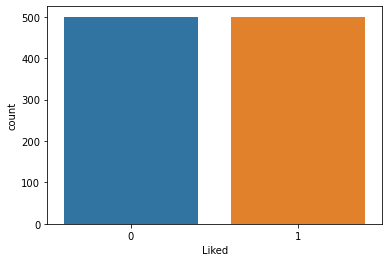

In [87]:
sns.countplot(dfs["Liked"])

In [88]:
dfs["length"]=dfs["Review"].apply(len)

In [89]:
dfs.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<AxesSubplot:ylabel='Frequency'>

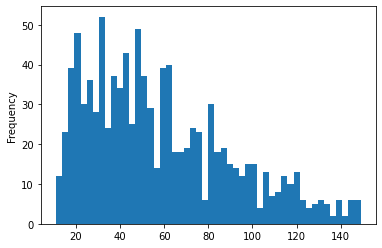

In [90]:
dfs["length"].plot(bins=50,kind="hist")

In [91]:
dfs.length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

In [92]:
positive=dfs[dfs["Liked"]==1]
negative=dfs[dfs["Liked"]==0]

In [93]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91729\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]', ' ',dfs['Review'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review=[ps.stem(word) for word in review if not word in set (all_stopwords)]
    review=' '.join(review)
    corpus.append(review)

In [95]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
cv= CountVectorizer(max_features=1500)


In [98]:
x=cv.fit_transform(corpus).toarray()
y=dfs.iloc[:,1]

In [99]:
x.shape

(1000, 1500)

In [100]:
y.shape

(1000,)

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [102]:
from sklearn.naive_bayes import GaussianNB
classifier_nb =GaussianNB()
classifier_nb.fit(x_train,y_train)

GaussianNB()

In [103]:
y_pred=classifier_nb.predict(x_test)

In [111]:
!pip install xgboost

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [109]:
acc=accuracy_score(y_test,y_pred)
print(acc*100)

69.0


In [112]:
from xgboost import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [113]:
y_pred=classifier_xgb.predict(x_test)

In [114]:
acc=accuracy_score(y_test,y_pred)
print(acc*100)

75.5


In [116]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[85, 15],
       [34, 66]], dtype=int64)